<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-3-4df13306bf58>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Become familiar with the dataset

### The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Task 2: Generate Descriptive Statistics and Visualizations
For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

## 2.1) For the "Median value of owner-occupied homes" provide a boxplot

21.2


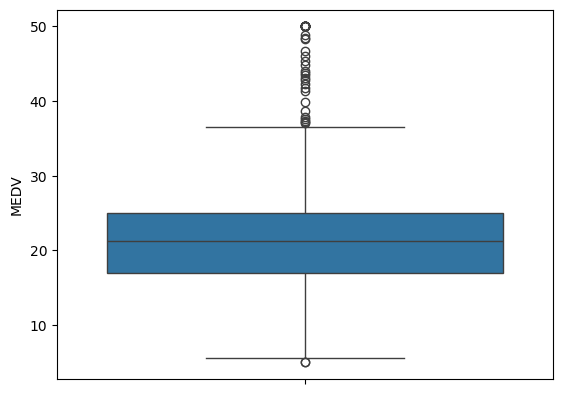

In [28]:
bx = sns.boxplot(y='MEDV', data=boston_df)
print(boston_df['MEDV'].median())

### EXPLANATION
### Half of the median values are below 21.2.

## 2.2) Provide a  bar plot for the Charles river variable

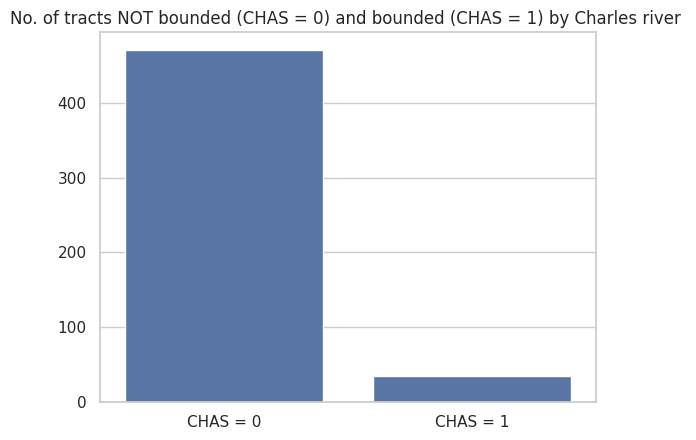

In [35]:
sns.set(style="whitegrid")
# count the occurrences
charles_rv_1 = boston_df[boston_df['CHAS'] == 1]['CHAS'].count()
charles_rv_0 = boston_df[boston_df['CHAS'] == 0]['CHAS'].count()

# initialize data of occurrences
data = {'CHAS = 0': charles_rv_0,
        'CHAS = 1': charles_rv_1}
ax = sns.barplot(data).set_title("No. of tracts NOT bounded (CHAS = 0) and bounded (CHAS = 1) by Charles river ")

### EXPLANATION
### There are more tracts that are not bounded by Charles river than tracts that are bounded.

## 2.3) Provide a boxplot for the MEDV variable vs the AGE variable. 

<AxesSubplot:xlabel='AGE_GROUP', ylabel='MEDV'>

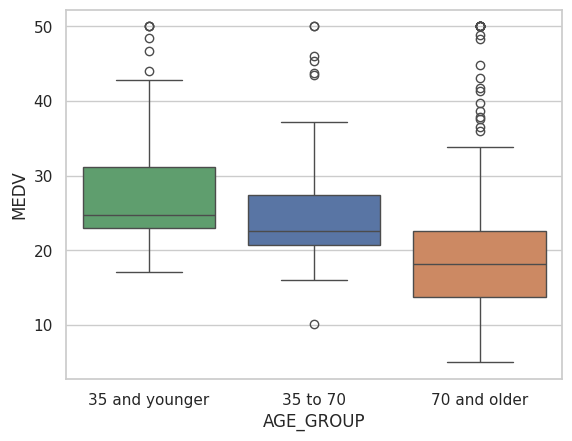

In [39]:
# Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70) , 'AGE_GROUP'] = '35 to 70'
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 and younger'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 and older'
sns.boxplot(data = boston_df, x = 'AGE_GROUP', y = 'MEDV', hue = 'AGE_GROUP', order=['35 and younger','35 to 70', '70 and older'])


### EXPLANATION
###  Median value of owner-occupied homes (in $1000's) are higher amoung younger age group than in older age group.

## 2.4) Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

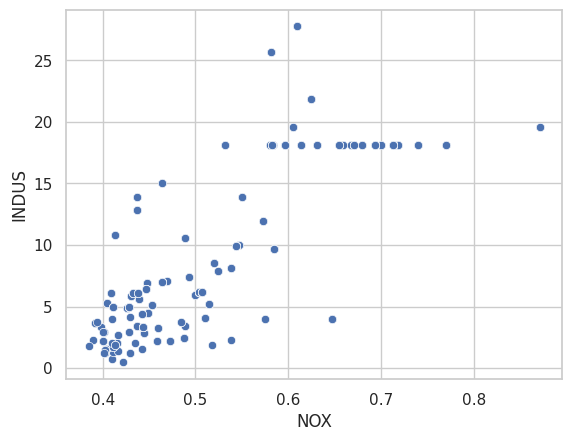

In [52]:
sns.scatterplot(x = boston_df['NOX'], y = boston_df['INDUS'])

### EXPLANATION
### There is a direct relationship between the nitric oxide concentrations and proportion of non-retail business acres per town.

## 2.5)  Create a histogram for the pupil to teacher ratio variable

<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

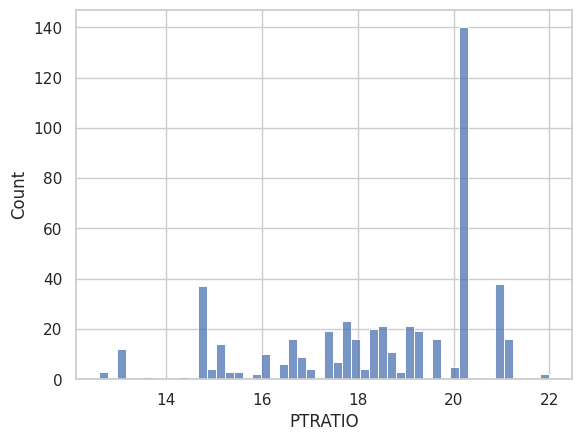

In [49]:
sns.histplot(boston_df['PTRATIO'], bins=50)

## EXPLANATION
## Pupil to teacher ratio ranges between 0% and 22%. But many areas have ratios bewteen 20% and 22%.

# Task 3: Use the appropriate tests to answer the questions provided.

### 3.1 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#### Null Hypothesis, Alternative Hypothesis and Significance Level

In [50]:
print('Null hypothesis: The median value of houses bounded by Charles river are the same as the median value of houses NOT bounded by Charles river.') 
print('Alternative hypothesis: The https://github.com/sanjeevani-t/analysis_of_boston_housing_data/blob/main/Boston_Housing_Analysis.jupyterlite.ipynb  ') 
print('Significance level alpha is 0.05')

Null hypothesis: The median value of houses bounded by Charles river are the same as the median value of houses NOT bounded by Charles river.
Alternative hypothesis: The https://github.com/sanjeevani-t/analysis_of_boston_housing_data/blob/main/Boston_Housing_Analysis.jupyterlite.ipynb  
Significance level alpha is 0.05


In [63]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

#### Conclusion

In [1]:
print('Since the p-value is less than 0.05, we reject the null hypothesis since there is evidence that median value of houses bounded by Charles river are the different as the median value of houses NOT bounded by Charles river.   ')

Since the p-value is less than 0.05, we reject the null hypothesis since there is evidence that median value of houses bounded by Charles river are the different as the median value of houses NOT bounded by Charles river.   


### 3.2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 

#### Null Hypothesis, Alternative Hypothesis and Significance Level

In [66]:
print('Null hypothesis: The median value of houses are the same for each proportion of owner occupied units built prior to 1940.') 
print('Alternative hypothesis: The median value of houses are the different for each proportion of owner occupied units built prior to 1940.') 
print('Significance level alpha is 0.05')

Null hypothesis: The median value of houses are the same for each proportion of owner occupied units built prior to 1940.
Alternative hypothesis: The median value of houses are the different for each proportion of owner occupied units built prior to 1940.
Significance level alpha is 0.05


In [67]:
f_statistic, p_value = scipy.stats.f_oneway(boston_df[boston_df['AGE_GROUP']=='35Y and younger']['MEDV'], 
                                            boston_df[boston_df['AGE_GROUP']=='bet. 35Y and 70Y']['MEDV'], 
                                            boston_df[boston_df['AGE_GROUP']=='70Y and older']['MEDV'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


#### Conclusion

In [3]:
print('Since the p-value is less than 0.05, we reject the null hypothesis since there is evidence that the median value of houses are the different for each proportion of owner occupied units built prior to 1940.')

Since the p-value is less than 0.05, we reject the null hypothesis since there is evidence that the median value of houses are the different for each proportion of owner occupied units built prior to 1940.


### 3.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

#### Null Hypothesis, Alternative Hypothesis and Significance Level

In [1]:
print('Null hypothesis: There is NO linear relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.') 
print('Alternative hypothesis: There is a linear relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.') 
print('Significance level alpha is 0.05')

Null hypothesis: There is NO linear relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
Alternative hypothesis: There is a linear relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
Significance level alpha is 0.05


In [16]:
p_statistic, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("Pearson Statistic: {0}, P-Value: {1}".format(p_statistic,p_value))

Pearson Statistic: 0.7636514469209192, P-Value: 7.913361061210442e-98


#### Conclusion

In [2]:
print('Since the p-value is less than 0.05, we reject the null hypothesis since there is evidence that  there is a linear relationship between Nitric oxide concentrations and proportion of non-retail business acres per town')

Since the p-value is less than 0.05, we reject the null hypothesis since there is evidence that  there is a linear relationship between Nitric oxide concentrations and proportion of non-retail business acres per town


### 3.4 What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

#### Null Hypothesis, Alternative Hypothesis and Significance Level

In [5]:
print('Null hypothesis: There is NO linear relationship between the weighted distance to the five Boston employment centres and the median value of owner occupied homes.') 
print('Alternative hypothesis: There is a linear relationship between the weighted distance to the five Boston employment centres and the median value of owner occupied homes..') 
print('Significance level alpha is 0.05')

Null hypothesis: There is NO linear relationship between the weighted distance to the five Boston employment centres and the median value of owner occupied homes.
Alternative hypothesis: There is a linear relationship between the weighted distance to the five Boston employment centres and the median value of owner occupied homes..
Significance level alpha is 0.05


In [18]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        20:14:08   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion

In [1]:
print('Since the p-value is less than 0.05, we reject the null hypothesis, i.e., there is an evidence showing a linear relationship between the weighted distance to the five Boston employment centres and the median value of owner occupied homes.')
print('An increase of one unit of weighted distance to the five Boston employment centre leads to around 18 unit increase in the median value of owner occupied homes.')
print('Note however that DIS does not fully explain the variation in MEDV given that the regression line has low R-squared.')

Since the p-value is less than 0.05, we reject the null hypothesis, i.e., there is an evidence showing a linear relationship between the weighted distance to the five Boston employment centres and the median value of owner occupied homes.
An increase of one unit of weighted distance to the five Boston employment centre leads to around 18 unit increase in the median value of owner occupied homes.
Note however that DIS does not fully explain the variation in MEDV given that the regression line has low R-squared.


<AxesSubplot:xlabel='DIS', ylabel='MEDV'>

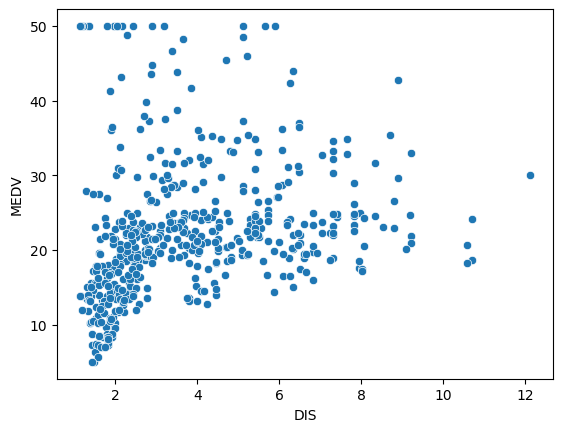

In [20]:
sns.scatterplot(x = boston_df['DIS'], y = boston_df['MEDV'])